## Importation des librairies

In [10]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

## Création d'un circuit de 3 Qbits

Vu que les deux gardiens savent où se trouve le trésor, il faut lui attribuer à chacun un Qbit

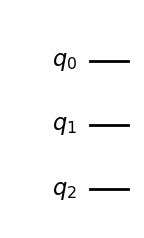

In [11]:
circ = QuantumCircuit(3)
circ.draw('mpl')

<b>Qbit 0</b> : Gardien de droite
<b>Qbit 1</b> : Gardien de gauche
<b>Qbit 2</b> : Ligne de Mensonge

## Programmation de portes

### Etat initial

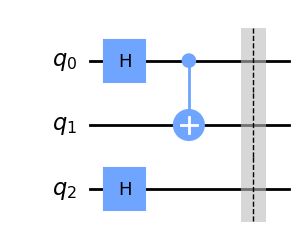

In [12]:
# On utilise une porte Hadamard sur q0 pour placer le trésor,
# suivie d'une porte CNOT de q0 à q1 pour assurer que les deux gardiens ont la même information.
circ.h(0)
circ.cx(0,1)

# On utilise un porte hadamard sur la ligne de mensonge pour indiquer qu'un des gardiens ment.
circ.h(2)

#On trace une barrière pour délimiter cette première phase du circuit, et on affiche le progrèss
circ.barrier(range(3))
circ.draw('mpl')

### Ligne du mensonge

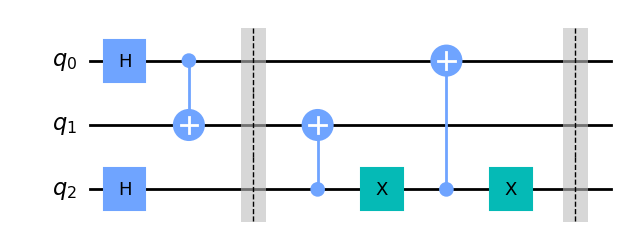

In [13]:
# Si la ligne de ménsonge (q2) est en état 1, c'est le gardien de gauche (q1) qui ment.
# Dans ce cas, il faut inverser sa réponse et, pour ce faire, on utilise une porte
# CNOT du q2 au q1.
circ.cx(2,1)
circ.x(2)

# Si la ligne de ménsonge (q2) est en état 0, c'est le gardien de droite (q0) qui ment.
# Dans ce cas, il faut également inverser sa réponse avec une porte CNOT du q2 au q0.
circ.cx(2,0)
circ.x(2)

circ.barrier(range(3))
circ.draw('mpl')

### Pose de la question aux gardiens

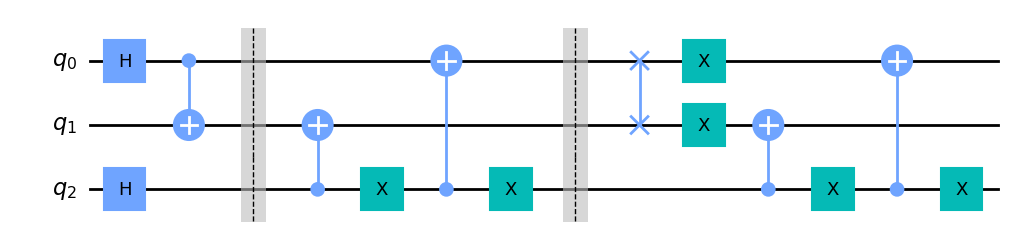

In [14]:
# Afin de représenter la réponse de l'autre gardien quand on le pose la question à chacun,
# on utilise une porte swap entre les deux (q0, q1) 
circ.swap(0,1)

# Vu que la question est "quelle porte il ne faut pas prendre ?", on ajoute
# un porte NOT sur chaque gardien (q0 et q1)
circ.x(0)
circ.x(1)

# Étant donné qu'un des gardiens ment toujours sur sa réponse, on applique à nouveau la
# même logique sur la ligne de mensonge
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)

circ.draw('mpl')

## Simulation

In [15]:
# Création du moteur de calcul à l'aide de la librairie Aer
backend = Aer.get_backend('statevector_simulator') 

# On exécute le circuit sur le simulateur
simulator = backend.run(circ)

# On récupère les résultats
result = simulator.result()

## Mesure du circuit

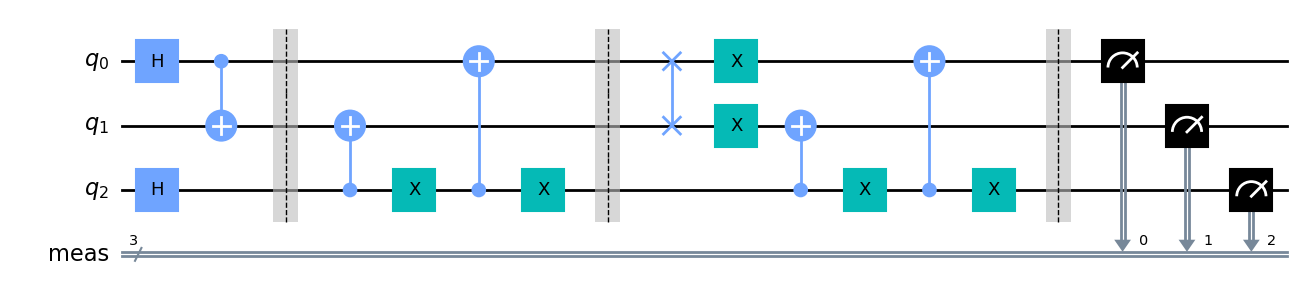

In [16]:
# Mesurer les 3 Qbits sur 3 sur des bits classiques
circ.measure_all()

circ.draw('mpl')

## Affichage et analyse des résultats

In [17]:
counts = result.get_counts()
print(counts)

{'000': 0.25, '011': 0.25, '100': 0.25, '111': 0.25}


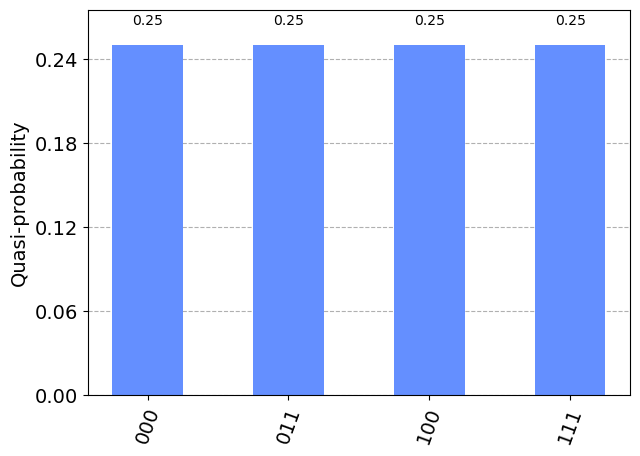

In [18]:
 # Histogramme de résultats
plot_histogram(counts)

## Sur les résultats, l'ordre des Qbits doit être lu de droite à gauche.

<b>L'état 000 représente :</b>
1 : 0 -> Le gardien de droite répond que le gardien de gauche dirait de ne pas prendre la porte de droite
2 : 0 -> Le gardien de gauche répond que le gardien de droite dirait de ne pas prendre la porte de droite
3 : 0 -> Le gardien qui ment est celui de droite
Par conséquence, le gardien de gauche dirait en réalité qu'il ne faut prendre la porte de gauche, donc le trésor est derrière la porte de droite

<b>L'état 011 représente :</b>
1 : 1 -> Le gardien de droite répond que le gardien de gauche dirait de ne pas prendre la porte de gauche
2 : 1 -> Le gardien de gauche répond que le gardien de droite dirait de ne pas prendre la porte de gauche
3 : 0 -> Le gardien qui ment est celui de droite
Par conséquence, le gardien de gauche dirait en réalité qu'il ne faut prendre la porte de droite, donc le trésor est derrière la porte de gauche 

<b>L'état 100 représente :</b>
1 : 0 -> Le gardien de droite répond que le gardien de gauche dirait de ne pas prendre la porte de droite
2 : 0 -> Le gardien de gauche répond que le gardien de droite dirait de ne pas prendre la porte de droite
3 : 1 -> Le gardien qui ment est celui de gauche
Par conséquence, le gardien de droite dirait en réalité qu'il ne faut prendre la porte de gauche, donc le trésor est derrière la porte de droite

<b>L'état 111 représente :</b>
1 : 1 -> Le gardien de droite répond que le gardien de gauche dirait de ne pas prendre la porte de gauche
2 : 1 -> Le gardien de gauche répond que le gardien de droite dirait de ne pas prendre la porte de gauche
3 : 1 -> Le gardien qui ment est celui de gauche
Par conséquence, le gardien de droite dirait en réalité qu'il ne faut prendre la porte de droite, donc le trésor est derrière la porte de gauche

<b>Probabilités :</b>
Sur l'histogramme, on peut remarquer que les quatre possibilités du circuit ont la même probabilité de se produire
 lors de la première exécution de la simulation